In [4]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
sns.set_style("dark")
total_results = sns.load_dataset("/results", data_home='./results')
total_results = total_results.loc[total_results['environment']=='dubins_car']

# Plot Static Envs

In [5]:
AXIS_LABEL_SIZE = 15
TITLE_SIZE = 16
LEGEND_SIZE = 13
TICKS_SIZE = 12

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


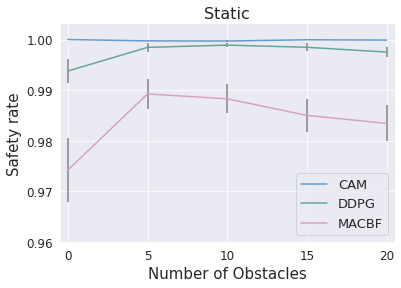

In [6]:
import matplotlib.pyplot as plt
import numpy as np

colors = np.array([[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[total_results['dataset']=='static']
ax = sns.lineplot(x="density", y="safe_rate",
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(0.96, 1.003)
ax.set_xlim(-0.5, 20.5)
ax.set_xticks([0,5,10,15,20])
ax.set_yticks([0.96,0.97,0.98,0.99,1.0])
ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Obstacles', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Static', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')  

plt.savefig('results/plots/1.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


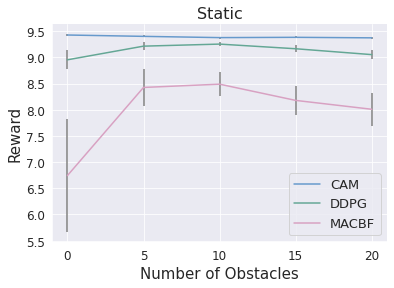

In [8]:
import matplotlib.pyplot as plt
import numpy as np
results = total_results.loc[total_results['dataset']=='static']
ax = sns.lineplot(x="density", y="reward", 
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.legend(loc='lower right', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
# ax.set_ylim(0.96, 1.003)
# ax.set_xlim(-0.5, 20.5)
ax.set_xticks([0,5,10,15,20])
# ax.set_yticks([0.96,0.97,0.98,0.99,1.0])
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Obstacles', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Static', fontsize=TITLE_SIZE)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')
plt.tick_params(labelsize=TICKS_SIZE)
plt.savefig('results/plots/2.pdf', bbox_inches='tight')    

# Plot Dynamic Envs

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


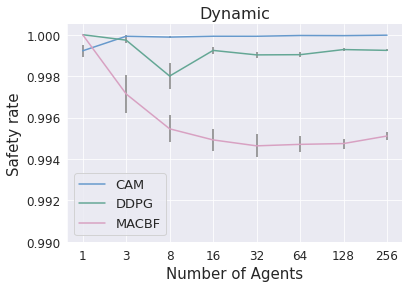

In [393]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[total_results['dataset']=='dynamic']
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(0.99, 1.0005)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticks(['1','3','8','16','32','64','128','256'])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
ax.legend(loc='lower left', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Agents', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Dynamic', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')    
plt.savefig('results/plots/3.pdf', bbox_inches='tight')      

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


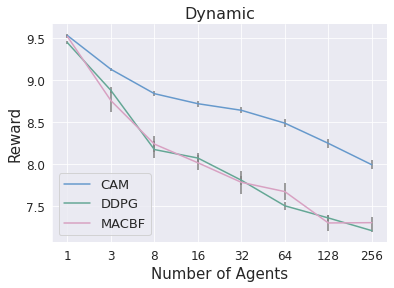

In [389]:
import matplotlib.pyplot as plt
import numpy as np
results = total_results.loc[total_results['dataset']=='dynamic']
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
# ax.set_ylim(-4., 10.1)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticks(['1','3','8','16','32','64','128','256'])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
ax.legend(loc='lower left', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Number of Agents', fontsize=AXIS_LABEL_SIZE)
ax.set_title('Dynamic', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')    
plt.savefig('results/plots/4.pdf', bbox_inches='tight')        

# Plot Mixed Envs

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


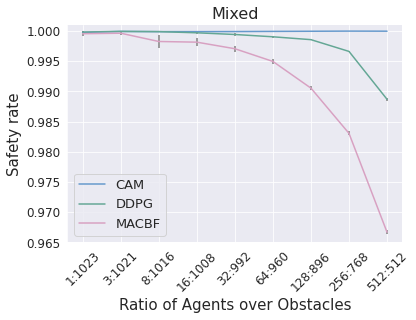

In [390]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[total_results['dataset']=='mixed']
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="safe_rate",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
ax.set_ylim(0.965, 1.001)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
ax.legend(loc='lower left', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Safety rate', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Mixed', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['safe_rate'], 
            yerr=0.1*np.array(results['safe_rate_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')    
plt.savefig('results/plots/5.pdf', bbox_inches='tight')    

/home/rainorangelemon/anaconda3/envs/gnn/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


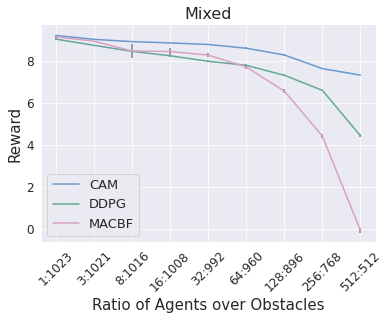

In [391]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

colors = np.array([[0.4, 0.6, 0.8],[0.39310315, 0.65498975, 0.58411251],
                  [0.84585876, 0.63132944, 0.75965549]])

results = total_results.loc[total_results['dataset']=='mixed']
results = deepcopy(results)
# results['density'] = [str(d) for d in results['density']]
results['density'] = [str(d) for d in results['density']]
results['density'] = pd.Categorical(results['density'],
                                   categories=['1','3','8','16','32','64','128','256','512'],
                                   ordered=True)

ax = sns.lineplot(x="density", y="reward",sort=True,
                  # x_order=['1','3','8','16','32','64','128','256'],
                  hue_order=['CAM','DDPG','MACBF'],
                  hue="method", data=results,
                  palette=colors,
                  err_style='bars')
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
# ax.set_ylim(0.985, 1.0005)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
# ax.set_xticks()
ax.set_xticklabels(['{0:s}:{1:d}'.format(i, 1024-int(i)) for i in ['1','3','8','16','32','64','128','256','512']])
# ax.set_yticks([0.92,0.94,0.96,0.98,1.0])
ax.legend(loc='lower left', ncol=1, fancybox=True, shadow=False, fontsize=LEGEND_SIZE)
ax.set_ylabel('Reward', fontsize=AXIS_LABEL_SIZE)
ax.set_xlabel('Ratio of Agents over Obstacles', fontsize=AXIS_LABEL_SIZE)
plt.xticks(rotation=45)
ax.set_title('Mixed', fontsize=TITLE_SIZE)
plt.tick_params(labelsize=TICKS_SIZE)
ax.yaxis.grid(True)
ax.xaxis.grid(True)
# plt.setp(ax.patches, linewidth=0.01)
for patch in ax.patches:
    clr = patch.get_facecolor()
    patch.set_edgecolor(clr)
sns.despine()    
ax.errorbar(x=results['density'], 
            y=results['reward'], 
            yerr=0.1*np.array(results['reward_std']), 
            barsabove=True,
            ecolor='grey', fmt='none',fillstyle='none')    
plt.savefig('results/plots/6.pdf', bbox_inches='tight')    

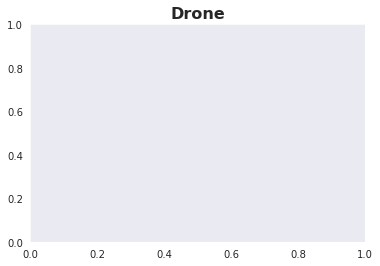

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pandas as pd

plt.clf()
plt.close('all')
ax = plt.figure()
# ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15),
#           ncol=3, fancybox=False, shadow=False)
# ax.set_ylim(0.985, 1.0005)
# ax.set_xlim(-0.5, 20.5)
# ax.set_xscale('log')
# ax.set_xticks()

plt.title('Drone', fontsize=TITLE_SIZE, weight='bold')    
plt.savefig('results/plots/drone_title.pdf', bbox_inches='tight')    